# Demo
https://plot.ly/ipython-notebooks/

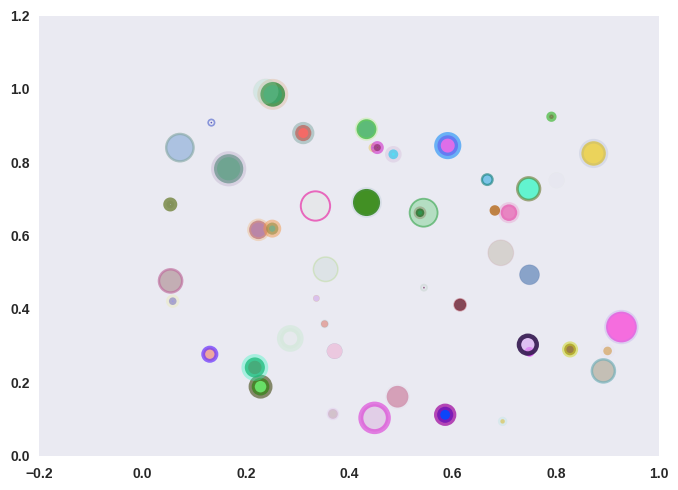

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py

n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

# py.iplot_mpl(fig,sharing='secret')

In [3]:
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

py.iplot_mpl(fig,sharing='secret')

PlotlyError: Error: This file cannot be saved as private, your current Plotly account has filled its quota of private files. You can still save public files, or you can upgrade your account to save more files privately by visiting your account at https://plot.ly/settings/subscription. To make a file public in the API, set the  optional argument 'world_readable' to true.

In [8]:
init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

In [6]:
#https://plot.ly/python/offline/
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Bar, Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])


'file:///home/takanori/Dropbox/git/ipynb-notes/plotly/temp-plot.html'

In [9]:
from plotly.graph_objs import *
import numpy as np
iplot([Box(y = np.random.randn(50), showlegend=False) for i in range(45)], show_link=False)

In [12]:
%ls

demo1.ipynb                demo2_offline.ipynb  temp-plot.html
demo2_offline-Copy1.ipynb  readme.txt


In [14]:
import plotly.tools as tls
tls.get_embed(file_id='./temp-plot.html')

TypeError: get_embed() takes at least 1 argument (1 given)

In [11]:

help(tls.get_embed)

Help on function get_embed in module plotly.tools:

get_embed(file_owner_or_url, file_id=None, width='100%', height=525)
    Returns HTML code to embed figure on a webpage as an <iframe>
    
    Plotly uniquely identifies figures with a 'file_owner'/'file_id' pair.
    Since each file is given a corresponding unique url, you may also simply
    pass a valid plotly url as the first argument.
    
    Note, if you're using a file_owner string as the first argument, you MUST
    specify a `file_id` keyword argument. Else, if you're using a url string
    as the first argument, you MUST NOT specify a `file_id` keyword argument,
    or file_id must be set to Python's None value.
    
    Positional arguments:
    file_owner_or_url (string) -- a valid plotly username OR a valid plotly url
    
    Keyword arguments:
    file_id (default=None) -- an int or string that can be converted to int
                              if you're using a url, don't fill this in!
    width (default="100%") -

In [11]:
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [14]:

import pandas as pd
df = pd.read_csv('https://plot.ly/~etpinard/191.csv')

iplot({
    'data': [
        Scatter(x=df[continent+'_Life Expentancy [in years]'],
                y=df[continent+'_Gross Domestic Product per Capita [in USD of the year 2000]'],
                text=df[continent+'_text'],
                marker=Marker(size=df[continent+'_marker.size'], sizemode='area', sizeref=131868,),
                mode='markers',
                name=continent) for continent in ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    ],
    'layout': Layout(xaxis=XAxis(title='Life Expectancy'), yaxis=YAxis(title='GDP per Capita', type='log'))
}, show_link=False)


In [15]:
import cufflinks as cf

In [17]:
iplot(cf.datagen.lines().iplot(asFigure=True,
                               kind='scatter',xTitle='Dates',yTitle='Returns',title='Returns'))

In [18]:
iplot(cf.datagen.heatmap(20,20).iplot(asFigure=True,
                                      kind='heatmap',colorscale='spectral',title='Cufflinks - Heatmap'))

In [19]:
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )

iplot(fig)

In [20]:
import plotly.plotly as py # all methods in plotly.plotly will communicate with a Plotly Cloud or Plotly Enterprise

# get_figure downloads a figure from plot.ly or Plotly Enterprise. 
# You need to provide credentials to download figures: https://plot.ly/python/getting-started/
fig = py.get_figure('https://plot.ly/~jackp/8715', raw=True)
iplot(fig)